## Marthi et al. 2020: FRB20180916B (FRB180916.J0158+65)

In [1]:
import os, glob, itertools
import numpy as np
import matplotlib.pyplot as plt
import pypulse, your
import driftrate, driftlaw
import frbrepeaters
import pandas as pd

B:\dev\frbrepeaters\driftrate.py:169: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[0:nx,:] = result_shifted[nx-1:2*nx-1,:]
B:\dev\frbrepeaters\driftrate.py:170: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[nx:2*nx-1,:] = result_shifted[0:nx-1,:]


type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


<ipython-input-1-4d1ff1ba89a9>:53: UserWarning: No contour levels were found within the data range.
  plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')


type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


B:\dev\frbrepeaters\driftrate.py:48: RuntimeWarning: invalid value encountered in sqrt
  width_x = np.sqrt(abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


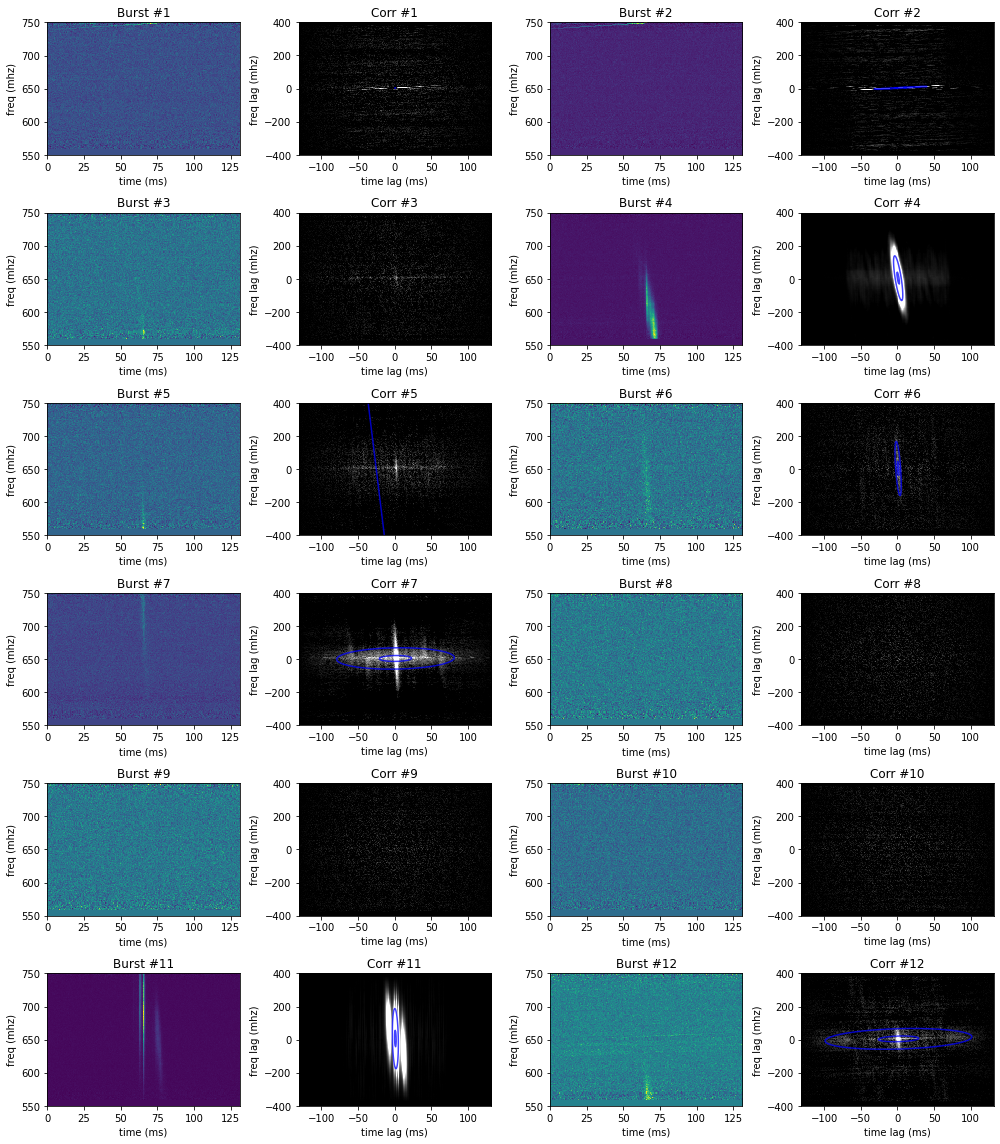

In [1]:
import os, glob, itertools
import numpy as np
import matplotlib.pyplot as plt
import pypulse, your
import driftrate, driftlaw
import frbrepeaters
import pandas as pd

# %matplotlib qt
%matplotlib inline

DM = 348.82       # pc/cm3
bwidth = 200   # mhz
df = bwidth / 2048   # mhz
dt = 327.68          # us
dt = 0.32768          # ms
lowest_freq = 550 # mhz

plt.figure(figsize=(14,16))
nrows, ncols = 6, 4
ploti = itertools.count(start=1, step=1)
burstnum = 1

for filename in glob.glob('data/marthi2020/DDTC123_24Mar2020/*.npy'):
    # print(f'loading {filename}')
    wfall = np.transpose(np.load(filename))
    wfall[:100] = 0
    wfall[2036:] = 0
    
    nfreq = 128
    tfac = 2
    wfall = driftrate.subsample(wfall, nfreq, wfall.shape[1]//tfac)
    wfall = driftrate.subtractbg(wfall, tleft=0, tright=100)
    ts = np.nanmean(wfall, axis=0)
    pkidx = np.nanargmax(ts)
   
    view = wfall[..., pkidx-100:pkidx+100]
    corr = driftrate.autocorr2d(view)
    print(f'type: {type(view)}\tshape: {view.shape}, type: {type(corr)}\tshape: {corr.shape}')
    drift, drift_error, popt, perr, theta, red_chisq, center_f, fitmap = driftrate.processBurst(view, bwidth/nfreq, dt*tfac, lowest_freq, verbose=False)
    extents, corrextents = driftrate.getExtents(view, df=bwidth/nfreq, dt=dt*tfac, lowest_freq=lowest_freq)

    plt.subplot(nrows, ncols, next(ploti))
    plt.imshow(view, origin='lower', interpolation='none', aspect='auto', extent=extents)
    plt.title(f'Burst #{burstnum}')
    plt.xlabel('time (ms)'), plt.ylabel('freq (mhz)')
    
    plt.subplot(nrows, ncols, next(ploti))
    plt.imshow(corr, origin='lower', interpolation='none', aspect='auto', extent=corrextents, cmap='gray')
    plt.clim(0, np.max(corr)/20)
    plt.title(f'Corr #{burstnum}')
    plt.xlabel('time lag (ms)'), plt.ylabel('freq lag (mhz)')
    if popt[0] > 0:
        plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')

    burstnum += 1

plt.tight_layout()
# plt.savefig('MarthiBursts.pdf')
plt.show()


# Luo et al. 2020: FRB180301

/home/mohammed/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


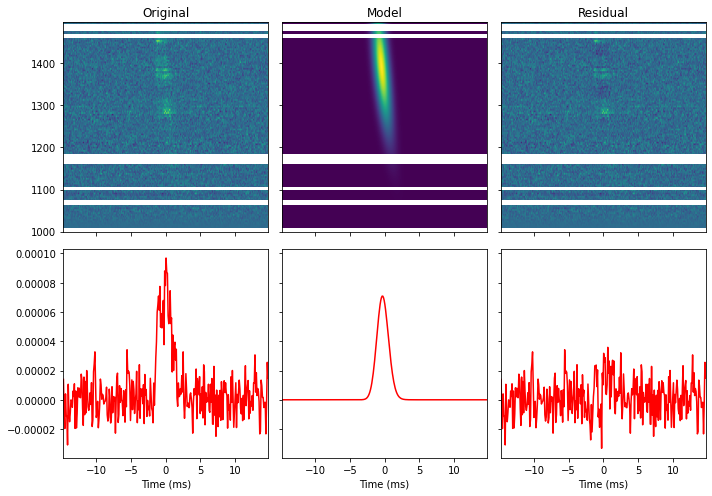

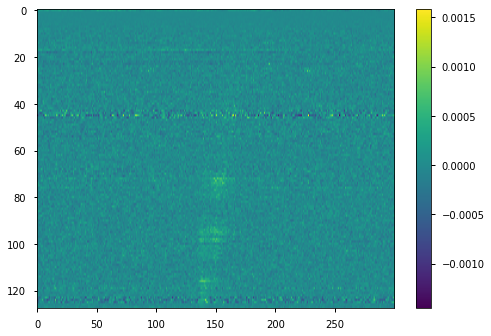

/home/mohammed/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


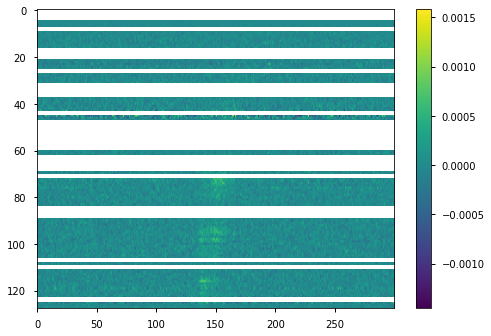

/home/mohammed/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/mnt/b/dev/burstfit/burstfit/utils/functions.py:150: RuntimeWarning: overflow encountered in exp
  B = np.exp((1 / 2) * (sigma / tau) ** 2)
/mnt/b/dev/burstfit/burstfit/utils/functions.py:155: RuntimeWarning: overflow encountered in exp
  pulse[scat_idx] = A * B * np.exp(ln_C) * D
/mnt/b/dev/burstfit/burstfit/utils/functions.py:155: RuntimeWarning: invalid value encountered in multiply
  pulse[scat_idx] = A * B * np.exp(ln_C) * D
/mnt/b/dev/burstfit/burstfit/utils/functions.py:278: RuntimeWarning: invalid value encountered in multiply
  model = l * spectra_from_fit[:, None]
/mnt/b/dev/burstfit/burstfit/utils/functions.py:155: RuntimeWarning: overflow encountered in multiply
  pulse[scat_idx] = A * B * np.exp(ln_C) * D


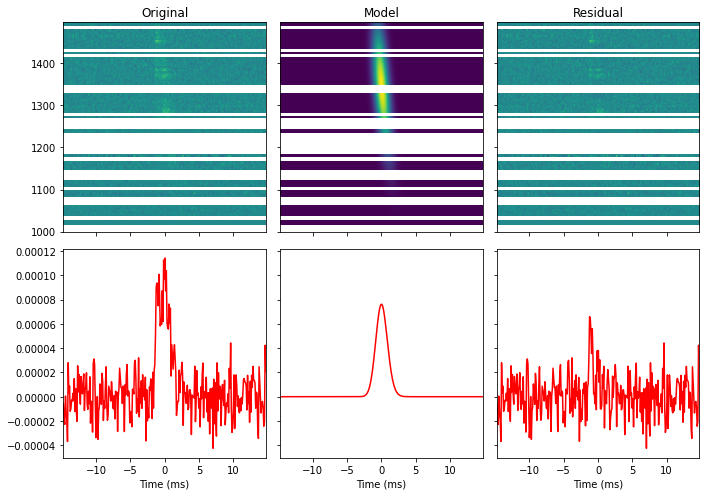

In [57]:
from burstfit.data import BurstData
from burstfit.fit import BurstFit
from burstfit.model import Model, SgramModel
from burstfit.utils.plotter import plot_me, plot_fit_results
from burstfit.utils.functions import pulse_fn_vec, sgram_fn_vec, gauss_norm, gauss_norm2
from your.utils.rfi import sk_sg_filter_raw

filename = 'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0086_sub.npz'
data = np.load(filename)

def prep_mask(nfchans, mask_chans=[]):
    input_mask = np.zeros(nfchans, dtype="bool")
    for m in mask_chans:
        if isinstance(m, tuple) or isinstance(m, list):
            assert len(m) == 2
            input_mask[m[0] : m[1]] = True
        elif isinstance(m, int):
            input_mask[m] = True
    return input_mask
                
mask = prep_mask(data['wfall'].shape[0], [125, 124, 123, 45, 44, 42, 43, 46, 26, 18, 17, 1, 0, 119])
wfall = np.ma.array(data['wfall'], mask=False*np.ones(data['wfall'].shape))
wfall.mask[mask, :] = True
pkidx = np.nanargmax(np.nanmean(wfall, axis=0))
wfall = wfall[..., pkidx-150:pkidx+150]

# For pulse, we will use a gaussian convolved with an exponential model 
pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)
snames = ['mu_f', 'sigma_f']
spectraModel = Model(gauss_norm, param_names=snames)
sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, mask=mask)

bf = BurstFit(
    sgram_model=sgramModel,
    sgram=wfall,
    width=wfall.shape[0],
    dm=data['DM'],
    foff=3.91,
    fch1=data['dfs'][0],
    tsamp=0.0983/1000,
    mask=mask)

bf.validate()
bf.precalc()
bf.fitall(plot=False)
plot_fit_results(bf.sgram, bf.sgram_model.evaluate, bf.sgram_params['all'][1]['popt'], bf.tsamp, bf.fch1, bf.foff, show=True, save=False)

## Using the noise removal stuff
view = data['wfall'][..., pkidx-150:pkidx+150]
plot_me(view)
sigma = 3
window = 15
mask = sk_sg_filter_raw(
    data=view.copy().T,
    foff=3.91,
    tsamp=0.0983/1000,
    spectral_kurtosis_sigma=sigma,
    savgol_frequency_window=window,
    savgol_sigma=sigma,
)
wfall2 = np.ma.array(view.copy(), mask=False*np.ones(view.copy().shape))
# mask = prep_mask(wfall2.shape[0], mask)
wfall2.mask[mask, :] = True
# wfall2[mask,:] = 0
plot_me(wfall2)

bf = BurstFit(
    sgram_model=sgramModel,
    sgram=wfall2,
    width=wfall2.shape[0],
    dm=data['DM'],
    foff=3.91,
    fch1=data['dfs'][0],
    tsamp=0.0983/1000,
    mask=mask)

bf.validate()
bf.precalc()
bf.fitall(plot=False)
plot_fit_results(bf.sgram, bf.sgram_model.evaluate, bf.sgram_params['all'][1]['popt'], bf.tsamp, bf.fch1, bf.foff, show=True, save=False)


In [83]:
masks = {
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20190716-M07_0086_sub.npz': [125, 124, 123, 45, 44, 42, 43, 46, 26, 18, 17, 1, 0, 119], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20190716-M07_0254_sub.npz': [43, 44, 46, 45, 119, 120, 124, 123, 125, 121, 122, 24, 23, 1, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20190716-M07_0260_sub.npz': [42, 44, 43, 45, 46, 125, 122, 124, 123, 119, 121, 120, 40, 41, 1, 0, 49, 25, 23], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20190716-M07_0409_sub.npz': [22, 23, 119, 120, 125, 124, 123, 29, 45, 46, 0, 43, 44], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_0030_sub.npz': [126, 125, 127, 0, 45, 47, 46], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_0520_sub.npz': [120, 119, 47, 46, 44, 45, 43, 41, 62, 50, 49], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_0621_sub.npz': [51, 50, 52, 46, 45, 62, 119, 120, 123, 122, 124, 126, 125, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_1003_sub.npz': [119, 120, 68, 70, 69, 67, 52, 54, 53, 44, 46, 45, 43, 35, 116], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_1463_sub.npz': [23, 22, 68, 69, 71, 125, 124, 123, 120, 118, 119, 122, 1, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_1481_sub.npz': [124, 123, 125, 119, 121, 120, 122, 1, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191008-M01_0098a_sub.npz': [1, 45, 46, 120, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191008-M01_0098b_sub.npz': [1, 45, 46, 120, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191008-M01_0334_sub.npz': [123, 125, 124, 43, 44, 45, 46, 0, 120, 119], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191008-M01_0850_sub.npz': [119, 121, 120, 26, 62, 44, 45, 47, 46, 27, 23], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191008-M01_1509_sub.npz': [119, 120, 68, 44, 46, 45, 23, 43]
}

np.save('luomasks.npy', [masks])
stuff = np.load('luomasks.npy', allow_pickle=True)[0]

dict

/mnt/b/dev/frbrepeaters/driftrate.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[0:nx,:] = result_shifted[nx-1:2*nx-1,:]
/mnt/b/dev/frbrepeaters/driftrate.py:173: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[nx:2*nx-1,:] = result_shifted[0:nx-1,:]


shape: (128, 298), 	shape: (255, 595)
shape: (128, 288), 	shape: (255, 575)
shape: (128, 187), 	shape: (255, 373)
shape: (128, 284), 	shape: (255, 567)


/mnt/b/dev/frbrepeaters/driftrate.py:50: RuntimeWarning: invalid value encountered in sqrt
  width_x = np.sqrt(abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
/home/mohammed/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/mohammed/.local/lib/python3.8/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/mohammed/.local/lib/python3.8/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/mnt/b/dev/frbrepeaters/driftrate.py:352: UserWarning: No contour levels were found within the data range.
  plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')


shape: (128, 282), 	shape: (255, 563)
shape: (128, 280), 	shape: (255, 559)


/mnt/b/dev/frbrepeaters/driftrate.py:52: RuntimeWarning: invalid value encountered in sqrt
  width_y = np.sqrt(abs((np.arange(row.size)-x)**2*row).sum()/row.sum())


shape: (128, 278), 	shape: (255, 555)
shape: (128, 276), 	shape: (255, 551)
shape: (128, 274), 	shape: (255, 547)
shape: (128, 272), 	shape: (255, 543)
shape: (128, 270), 	shape: (255, 539)
shape: (128, 268), 	shape: (255, 535)
shape: (128, 266), 	shape: (255, 531)
shape: (128, 264), 	shape: (255, 527)
shape: (128, 236), 	shape: (255, 471)


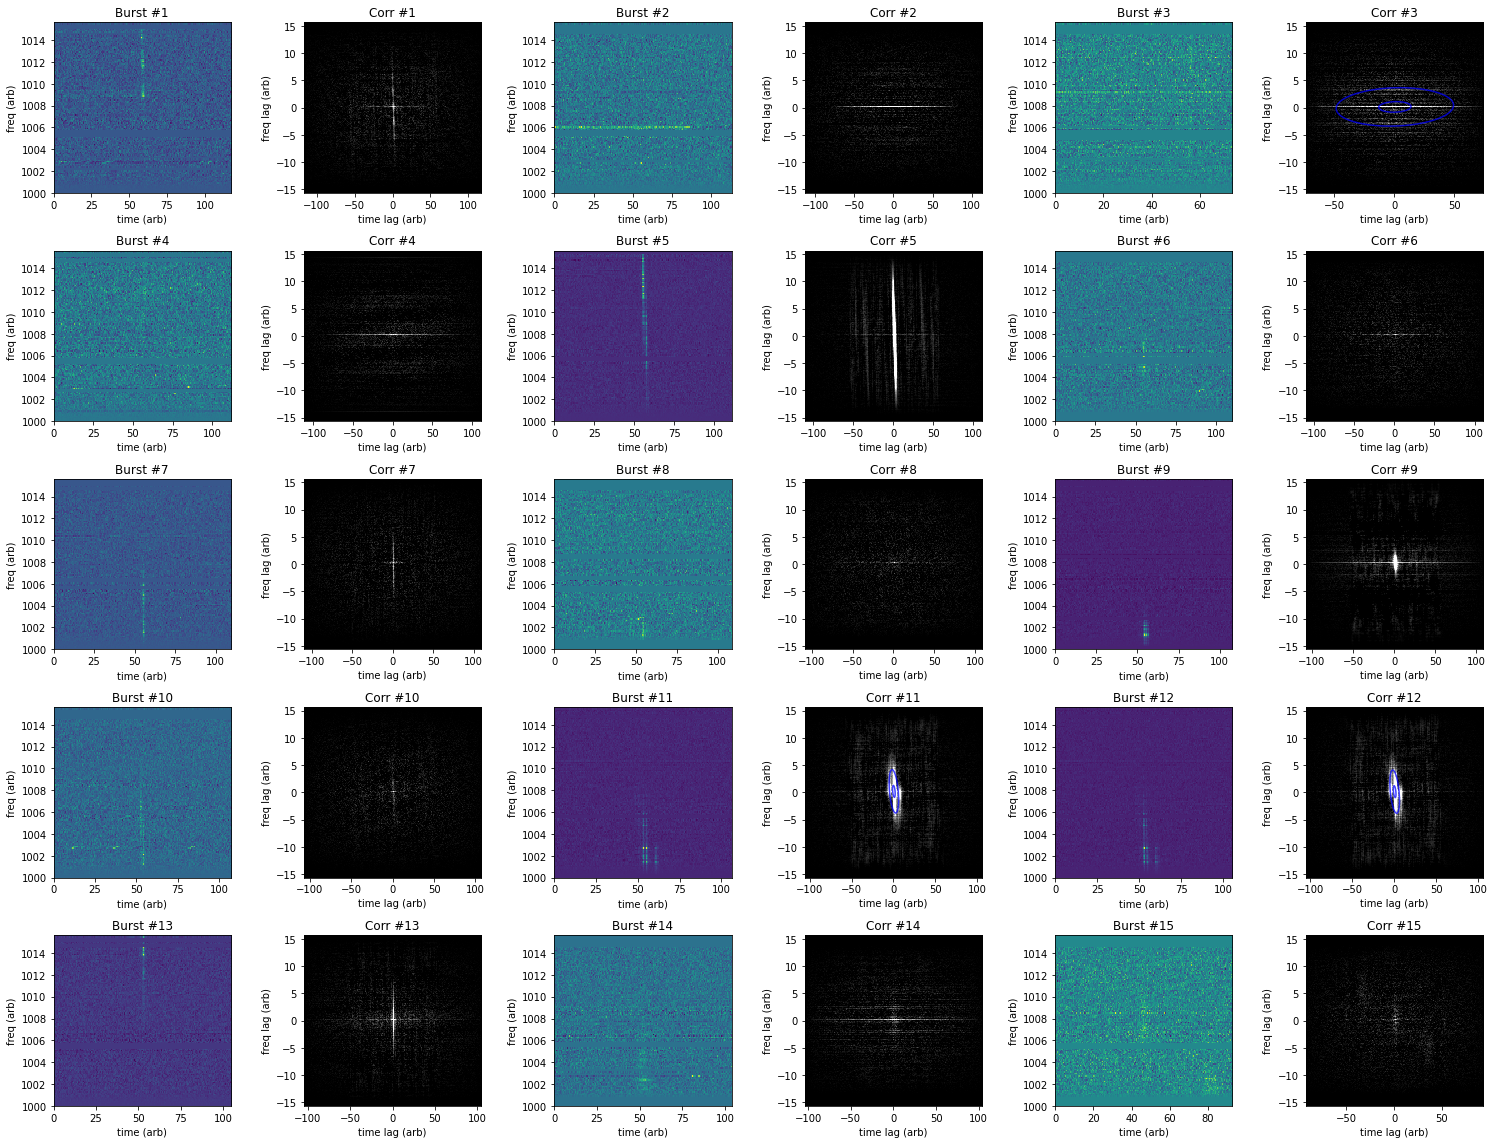

In [2]:
def loadluodata_raw(filename):
    ar = pypulse.Archive(filename, prepare=True)
    wfall = ar.getData()
    burstmetadata = {
        'dt'        : ar.getTimes(),
        'dfs'       : ar.getFreqs(),
        'DM'        : ar.getDM(),
        'bandwidth' : ar.getBandwidth(),
        'duration'  : ar.getDuration(),
        'center_f'  : ar.getCenterFrequency(),
        'freq_unit' : ar.getFrequencyUnit(),
        'time_unit' : ar.getTimeUnit(),
        'int_unit'  : ar.getIntensityUnit(),
        'telescope' : ar.getTelescope(),
        'burstSN'   : ar.getSN(),
        'raw_shape' : wfall.shape
    }
    
    subfall = driftrate.subsample(wfall, 128, wfall.shape[1]//4)
    pkidx = np.nanargmax(np.nanmean(subfall, axis=0))
    np.save(filename.split('.')[0] + '_sub.npy', subfall)    
    np.savez(filename.split('.')[0] + '_sub.npz', wfall=subfall, **burstmetadata)

    return subfall, pkidx, wfall, burstmetadata

def loadluodata_npz(filename):
    obsdata = np.load(filename)
    wfall = obsdata['wfall']
    for mask in masks[filename]:
        wfall[mask] = 0
    subfall = driftrate.subsample(wfall, 128, 7168//4)
    # subfall = driftrate.subtractbg(subfall, tleft=0, tright=10)
    pkidx = np.nanargmax(np.nanmean(subfall, axis=0))
    return subfall, pkidx, wfall, obsdata

masks = {
    'shape': (128, 7168),
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0086_sub.npz': [125, 124, 123, 45, 44, 42, 43, 46, 26, 18, 17, 1, 0, 119], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0254_sub.npz': [43, 44, 46, 45, 119, 120, 124, 123, 125, 121, 122, 24, 23, 1, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0260_sub.npz': [42, 44, 43, 45, 46, 125, 122, 124, 123, 119, 121, 120, 40, 41, 1, 0, 49, 25, 23], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0409_sub.npz': [22, 23, 119, 120, 125, 124, 123, 29, 45, 46, 0, 43, 44], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_0030_sub.npz': [126, 125, 127, 0, 45, 47, 46], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_0520_sub.npz': [120, 119, 47, 46, 44, 45, 43, 41, 62, 50, 49], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_0621_sub.npz': [51, 50, 52, 46, 45, 62, 119, 120, 123, 122, 124, 126, 125, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_1003_sub.npz': [119, 120, 68, 70, 69, 67, 52, 54, 53, 44, 46, 45, 43, 35, 116], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_1463_sub.npz': [23, 22, 68, 69, 71, 125, 124, 123, 120, 118, 119, 122, 1, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_1481_sub.npz': [124, 123, 125, 119, 121, 120, 122, 1, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191008-M01_0098a_sub.npz': [1, 45, 46, 120, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191008-M01_0098b_sub.npz': [1, 45, 46, 120, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191008-M01_0334_sub.npz': [123, 125, 124, 43, 44, 45, 46, 0, 120, 119], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191008-M01_0850_sub.npz': [119, 121, 120, 26, 62, 44, 45, 47, 46, 27, 23], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191008-M01_1509_sub.npz': [119, 120, 68, 44, 46, 45, 23, 43]
}

# driftrate.plotStampcard(loadluodata_raw, fileglob='data/luo2020/180813_ar_file/ar_file/converted/*.rf', figsize=(21, 16), nrows=5, ncols=6)
driftrate.plotStampcard(loadluodata_npz, fileglob='data/luo2020/180813_ar_file/ar_file/converted/*.npz', figsize=(21, 16), nrows=5, ncols=6)

In [19]:
ar = pypulse.Archive('data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0086.rf', prepare=True, thread=True)
dt, dfs = ar.getAxis('T'), ar.getAxis('F')
dt
# dt, dfs, luoDM = ar.getTimes(), ar.getFreqs(), ar.getDM(), ar.getBandwidth(), ar.getDuration(), ar.getCenterFrequency()
luometadata = {
    'dt'        : ar.getTimes(),
    'dfs'       : ar.getFreqs(),
    'DM'        : ar.getDM(),
    'bandwidth' : ar.getBandwidth(),
    'duration'  : ar.getDuration(),
    'center_f'  : ar.getCenterFrequency(),
    'freq_unit' :ar.getFrequencyUnit(),
    'time_unit' :ar.getTimeUnit(),
    'int_unit'  :ar.getIntensityUnit(),
    'telescope' :ar.getTelescope(),
    'burstSN'   :ar.getSN(),
}
print(metadata)
print(ar.getData().shape, dfs[1]-dfs[0], (dfs[-1] - dfs[0])/len(dfs))
timeres = metadata['dt'][0] / ar.getData().shape[1]

{'dt': array([0.70464307]), 'dfs': array([1000.        , 1000.12207031, 1000.24414062, ..., 1499.63378906,
       1499.75585938, 1499.87792969]), 'DM': 518.3, 'bandwidth': 500.0, 'duration': 1.409286144, 'center_f': 1250.0, 'freq_unit': 'MHz', 'time_unit': 'SEC', 'int_unit': 'Jy', 'telescope': 'FAST', 'burstSN': 5.30820815917212}
(4096, 28672) 0.1220703125 0.1220405101776123


2.4576e-05

In [308]:
# df = pd.read_csv('FRBName_results_3rows_Jul21.csv')
# df = df.set_index('name')
# df = driftlaw.computeModelDetails(df)
# df['DM'].dtype
df  = pd.DataFrame([['blah', 1.0, 'a']], columns=['name', 'val', 'val2']).set_index('name')
df2  = pd.DataFrame([['test2', 3.0, 'a']], columns=['name', 'val', 'val2']).set_index('name')
df3 = pd.DataFrame([['test2', 2.0, 'b']], columns=['name', 'val', 'val2']).set_index('name')
df4 = pd.DataFrame([['test2', 5.0, 'h']], columns=['name', 'val', 'val2']).set_index('name')
df = df.append([df2, df3])

display(df)
df.loc['test2'].set_index('val').loc[3.0]
df[df.val == df.val.min()]
df.to_csv('test.csv')

val val2
name           
blah   1.0    a
test2  3.0    a
test2  2.0    b

Loading: data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0086.rf
Load time: 34.69 s


  0%|                                                                                            | 0/11 [00:00<?, ?it/s]

resolution:  3.9052963256835938 0.098304
(4096, 28672) (128, 7168)


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:22<00:00,  2.05s/it]


DM  slope (mhz/ms)     center_f      theta
name                                                      
Burst1  516.300000      -67.337856  1372.474317  27.236543
Burst1  517.322222      -92.093128  1372.474317  20.827611
Burst1  518.344444     -143.099461  1372.474317   4.983186
Burst1  519.366667     -335.958987  1372.474317   7.971684
Burst1  520.388889      -11.593528  1372.474317  -0.283946
Burst1  521.411111       25.508239  1372.474317  -2.570796
Burst1  522.433333      107.686182  1372.474317   4.358966
Burst1  523.455556       75.439089  1372.474317  16.794054
Burst1  524.477778       58.655824  1372.474317  35.532998
Burst1  525.500000       47.879964  1372.474317  26.010938
Burst1  518.300000     -140.249786  1372.474317   4.988415

DM     center_f  slope (mhz/ms)  slope error (mhz/ms)  \
name                                                                    
Burst1  516.300000  1372.474317      -67.337856              0.062354   
Burst1  517.322222  1372.474317      -92.093128              0.112589   
Burst1  518.344444  1372.474317     -143.099461              0.274433   
Burst1  519.366667  1372.474317     -335.958987              1.540825   
Burst1  520.388889  1372.474317      -11.593528            787.324127   
Burst1  521.411111  1372.474317       25.508239            -56.105381   
Burst1  522.433333  1372.474317      107.686182              0.162645   
Burst1  523.455556  1372.474317       75.439089              0.081411   
Burst1  524.477778  1372.474317       58.655824              0.049945   
Burst1  525.500000  1372.474317       47.879964              0.034100   
Burst1  518.300000  1372.474317     -140.249786              0.259499   

            theta     red_chisq  amplitude          xo          yo  \
name                                                                 
Burst1  27.236543  1.625163e+01   0.000023  300.453141  128.443017   
Burst1  20.827611  1.671092e+01   0.000023  300.457325  128.388223   
Burst1   4.983186  1.614265e+01   0.000023  300.460997  128.369067   
Burst1   7.971684  1.614481e+01   0.000023  300.465063  128.423783   
Burst1  -0.283946  2.516659e+01  -0.000075  575.918210  782.470550   
Burst1  -2.570796  2.813852e+06  -1.000000   -1.000000   -1.000000   
Burst1   4.358966  1.533532e+01   0.000023  300.469232  128.533444   
Burst1  16.794054  1.523717e+01   0.000022  300.474205  128.498813   
Burst1  35.532998  1.540192e+01   0.000022  300.468487  128.483553   
Burst1  26.010938  1.564277e+01   0.000022  300.474393  128.485845   
Burst1   4.988415  1.674476e+01   0.000023  300.460522  128.371348   

            sigmax  ...  slope_abs_nuobssq   min_sigma    max_sigma  \
name                ...                                               
Burst1  -35.442546  ...       3.574792e-08    8.115246    35.442546   
Burst1   -8.541066  ...       4.888986e-08    8.541066    33.904425   
Burst1    8.944596  ...       7.596780e-08    8.944596    32.849710   
Burst1  -31.838793  ...       1.783519e-07    9.248986    31.838793   
Burst1  126.449915  ...       6.154704e-09  126.449915  1134.137009   
Burst1   -1.000000  ...      -1.354166e-08    1.000000     1.000000   
Burst1   33.899227  ...      -5.716781e-08    8.963550    33.899227   
Burst1  -35.747000  ...      -4.004866e-08    8.645762    35.747000   
Burst1    8.216280  ...      -3.113886e-08    8.216280    37.715266   
Burst1   39.864712  ...      -2.541823e-08    7.775014    39.864712   
Burst1    8.927728  ...       7.445498e-08    8.927728    32.836386   

        min_sigma_error  max_sigma_error   sigma_t     tau_w  tau_w_error  \
name                                                                        
Burst1         0.009624         0.042031  0.000798  0.000918     0.001089   
Burst1         0.009984         0.039634  0.000840  0.001830     0.002140   
Burst1         0.010633         0.039058  0.000879  0.002347     0.002790   
Burst1         0.011026         0.037956  0.000909  0.000915     0.001091   
Burst1      3173.508194    403048.073081  0.012431  0.012942   331.561042   
Burst1        -1.000000        -1.000000  0.000098  0.000098     0.075290   
Burst1         0.010933         0.041347  0.000881  0.000935     0.001140   
Burst1         0.010589         0.043782  0.000850  0.000953     0.001167   
Burst1         0.010042         0.046091  0.000808  0.001371     0.001676   
Burst1         0.009489         0.048649  0.000764  0.000980     0.001197   
Burst1         0.010433         0.038376  0.000878  0.002323     0.002715   

        sigma_t_ms   tau_w_ms  
name                           
Burst1    0.797761   0.917910  
Burst1    0.839621   1.830482  
Burst1    0.879290   2.346720  
Burst1    0.909212   0.915007  
Burst1   12.430532  12.942197  
Burst

trialDM = 516.3 drift = -67.33785604455426 center_f = 1372.474317444763 theta = 27.236542952430916
trialDM = 517.3222222222222 drift = -92.09312823479011 center_f = 1372.474317444763 theta = 20.827610669870268
trialDM = 518.3444444444444 drift = -143.09946081160209 center_f = 1372.474317444763 theta = 4.9831858213004985
trialDM = 519.3666666666667 drift = -335.9589865756213 center_f = 1372.474317444763 theta = 7.971683809184603
trialDM = 520.3888888888889 drift = -11.593527575145364 center_f = 1372.474317444763 theta = -0.2839464022395708
trialDM = 521.411111111111 drift = 25.50823907223418 center_f = 1372.474317444763 theta = -2.5707963267948966
trialDM = 522.4333333333333 drift = 107.6861822840447 center_f = 1372.474317444763 theta = 4.35896635804663
trialDM = 523.4555555555555 drift = 75.43908907084881 center_f = 1372.474317444763 theta = 16.794053898905236
trialDM = 524.4777777777778 drift = 58.6558240088619 center_f = 1372.474317444763 theta = 35.532997520151724
trialDM = 525.5 dr

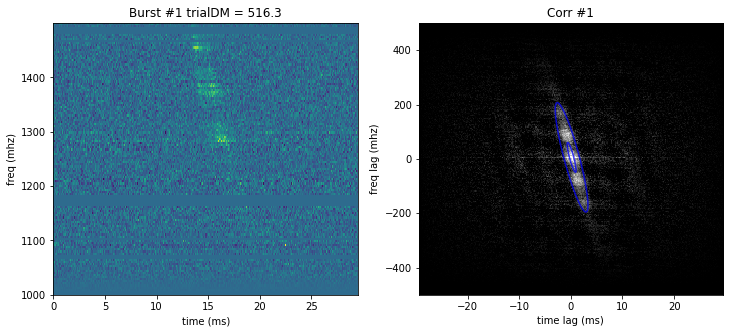

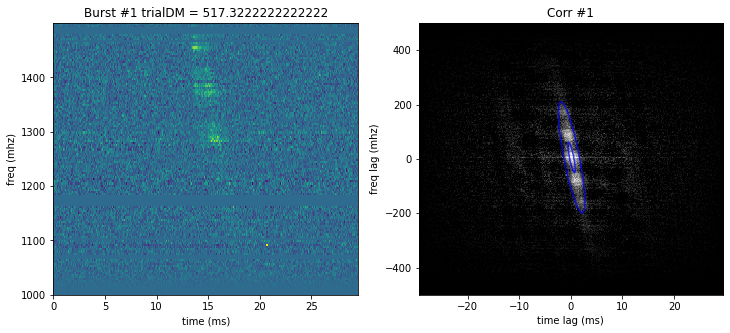

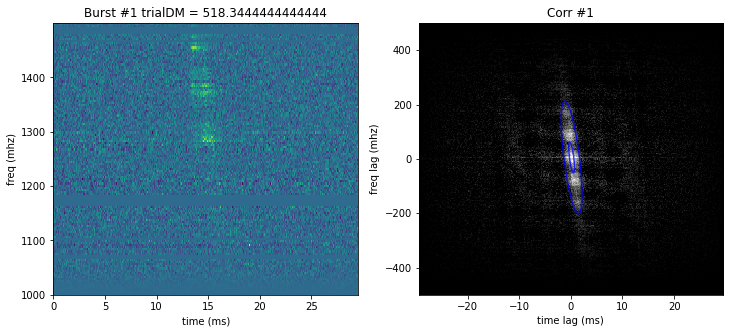

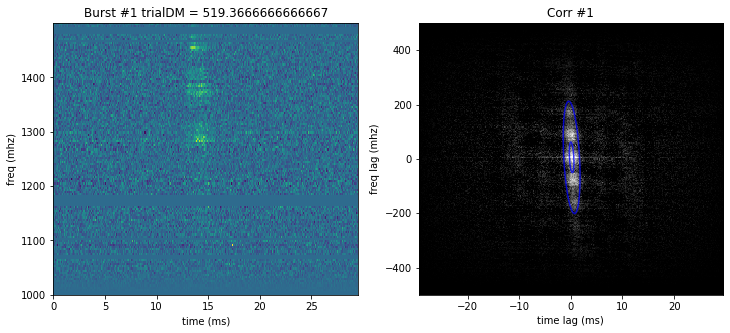

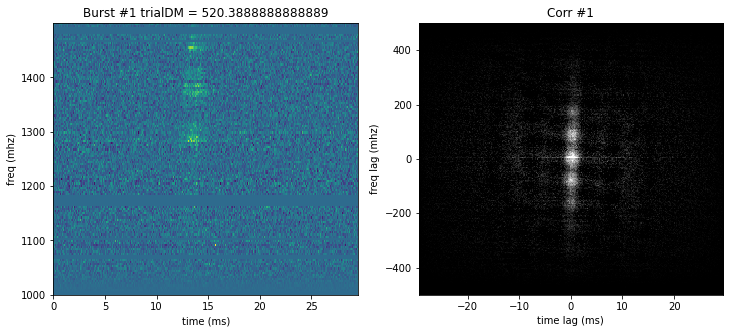

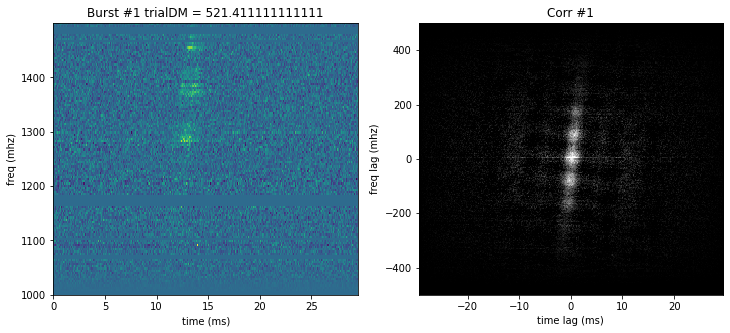

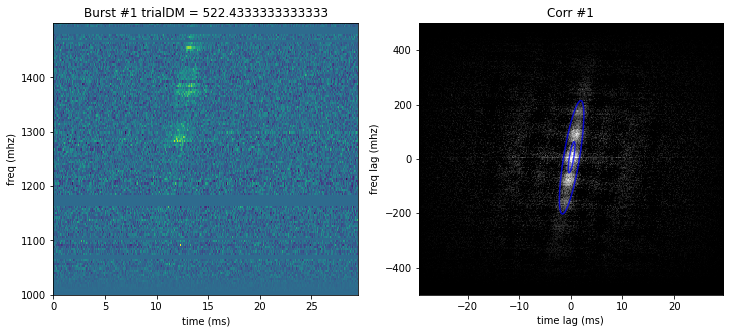

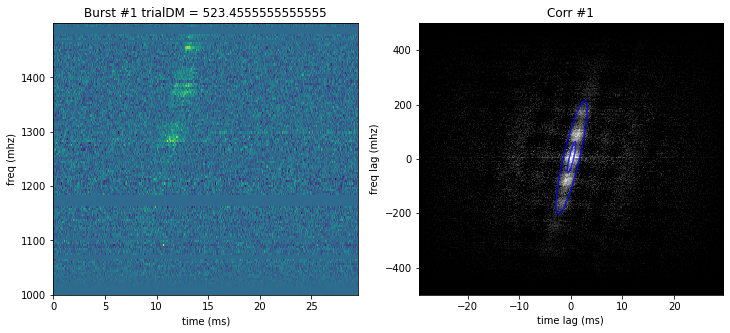

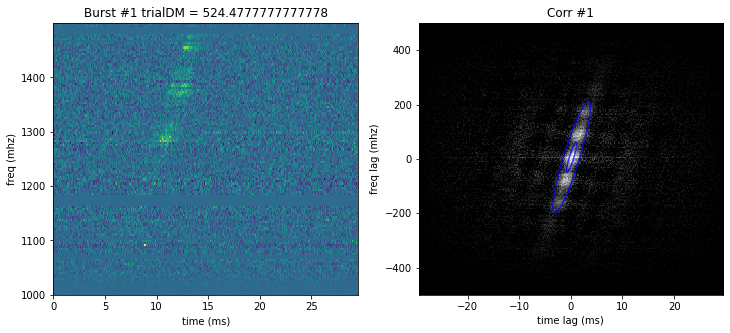

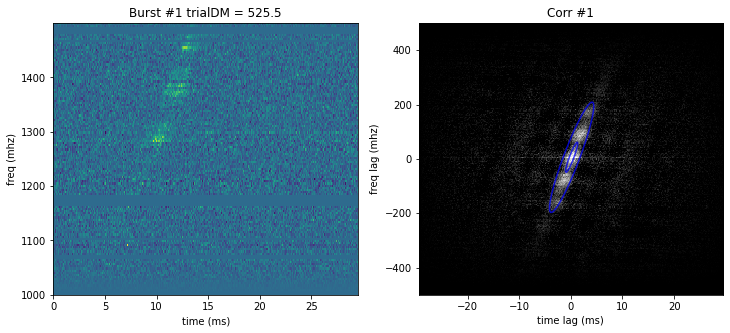

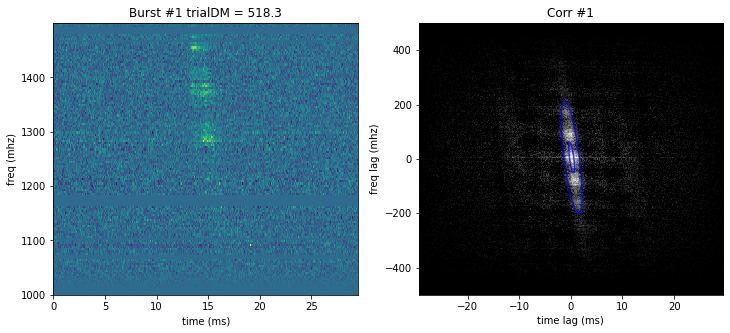

In [6]:
import warnings
warnings.filterwarnings("ignore")
import importlib
importlib.reload(driftrate)
importlib.reload(driftlaw)
# Single burst

# DM = 518.3       # pc/cm3
# bwidth = 500   # mhz
# df = (dfs[-1] - dfs[0])/len(dfs)   # mhz
# dt = metadata['dt'][0] / ar.getData().shape[1] # us
# dt = dt*1000          # ms
# lowest_freq = 1000 # mhz

subfall, pkidx, wfall, obsdata = loadluodata_raw('data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0086.rf')
subfall = driftrate.subsample(wfall, 128, wfall.shape[1]//4)

downf, downt = wfall.shape[0] / subfall.shape[0], wfall.shape[1] / subfall.shape[1]
DM = obsdata['DM']       # pc/cm3
bwidth = obsdata['bandwidth']   # mhz
dfs = obsdata['dfs']
df = (dfs[-1] - dfs[0])/len(dfs) * downf  # mhz

dt = obsdata['dt'][0] / wfall.shape[1]  * downt # s
dt = dt*1000          # ms
lowest_freq = 1000 # mhz
print('resolution: ', df, dt)

%matplotlib inline

# Burst 3 noise
# subfall[0:4]     = 0
# subfall[39:50]   = 0
# subfall[23:24]   = 0
# subfall[119:128] = 0

# Burst 1 noise
# subfall[0:14] = 0
# subfall[17:18] = 0
# subfall[26] = 0
# subfall[20:24] = 0
# subfall[43:46] = 0
# subfall[119:128] = 0
burst1maskchans = [125, 124, 123, 45, 44, 42, 43, 46, 26, 18, 17, 1, 0, 119]
for mchan in burst1maskchans:
    subfall[mchan] = 0

# subfall = driftrate.subtractbg(subfall, tleft=0, tright=5)
ts = np.nanmean(subfall, axis=0)
pkidx = np.nanargmax(ts)
print(wfall.shape, subfall.shape)
burstDM = 518.3
trialDMs = np.append(np.linspace(516.3, 525.5, num=10), burstDM)

view = subfall[..., pkidx-150:pkidx+150]
result, burstdf = driftrate.processDMRange('Burst1', view, burstDM, trialDMs, df, dt, lowest_freq)
display(burstdf[['DM', 'slope (mhz/ms)', 'center_f', 'theta']])
modeldf = driftlaw.computeModelDetails(burstdf)
display(modeldf)


for trialDM in trialDMs:
    view = subfall[..., pkidx-150:pkidx+150]
    view = driftrate.dedisperse(view, trialDM - burstDM, lowest_freq, df, dt)
    corr = driftrate.autocorr2d(view)

    drift, drift_error, popt, perr, theta, red_chisq, center_f, fitmap = driftrate.processBurst(view, df, dt, lowest_freq, verbose=False)
    extents, corrextents = driftrate.getExtents(view, df=df, dt=dt, lowest_freq=lowest_freq)

    # plt.plot(ts[pkidx-150:pkidx+150])

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(view, origin='lower', interpolation='none', aspect='auto', extent=extents)
    plt.title(f'Burst #{1} {trialDM = }')
    plt.xlabel('time (ms)'), plt.ylabel('freq (mhz)')

    plt.subplot(1, 2, 2)
    plt.imshow(corr, origin='lower', interpolation='none', aspect='auto', extent=corrextents, cmap='gray')
    plt.clim(0, np.max(corr)/20)
    plt.title(f'Corr #{1}')
    plt.xlabel('time lag (ms)'), plt.ylabel('freq lag (mhz)')
    if popt[0] > 0:
        plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')

    print(f"{trialDM = } {drift = } {center_f = } {theta = }")

(466560,)
72.0


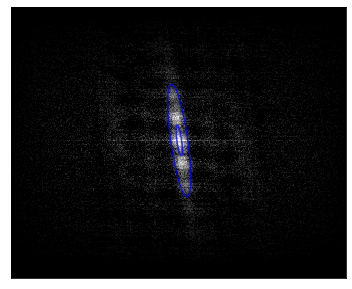

In [80]:
plt.figure(figsize=(6, 5))

# plt.imshow(corr, origin='lower', interpolation='none', aspect='auto', extent=corrextents, cmap='gray')
plt.imshow(corr, origin='lower', interpolation='none', aspect='auto', cmap='gray')

plt.clim(0, np.max(corr)/20)
# plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')
plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, origin='lower')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
fig = plt.gcf()
fig.canvas.draw()
texture = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
print(texture.shape)
fig.get_size_inches()*fig.dpi
print(fig.dpi)


In [24]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.gca()
ax.imshow(corr, origin='lower', interpolation='none', aspect='auto', extent=corrextents, cmap='gray')
# ax.clim(0, np.max(corr)/20)
if popt[0] > 0:
    ax.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')
ax.axis('off')
canvas.draw()
texture = np.fromstring(canvas.tostring_rgb(), dtype='uint8')

AttributeError: Figure.show works only for figures managed by pyplot, normally created by pyplot.figure()

In [25]:
# Checking gui results
# df = pd.read_csv('FRB180301_results_11rows_Jul15.csv')
# df.set_index('DM')

df = pd.read_csv('FRBName_results_4rows_Jul19.csv')
df = df.set_index('DM')
df = df.set_index(df.index.astype('float'))
df.loc[513.1170043945312]['slope (mhz/ms)']
# df.loc[df.index.unique()[0]]


-37.62141828955372

## Oostrum et al. 2020: FRB20121102A and FRB180814.J0422+73

<ipython-input-2-2d84867b63f3>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,4))


Loading: data/oostrum2020/R1_frb121102\R1_B30.rf
Load time: 4.20 s


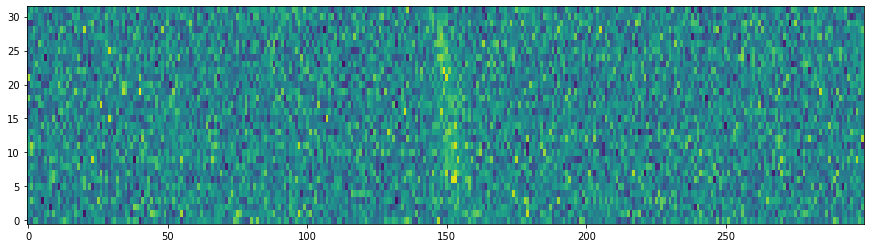

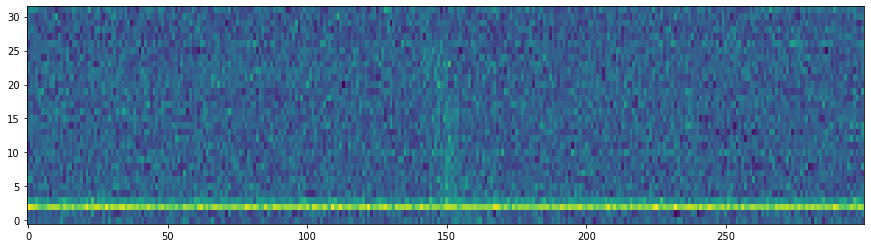

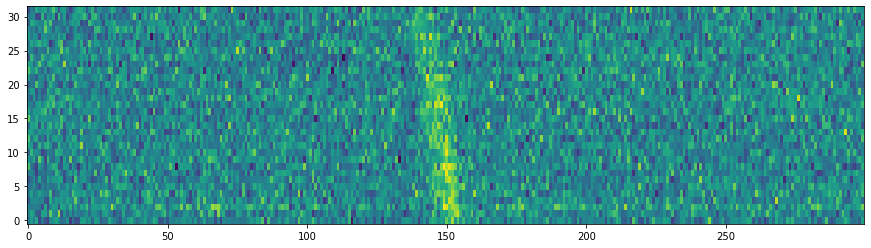

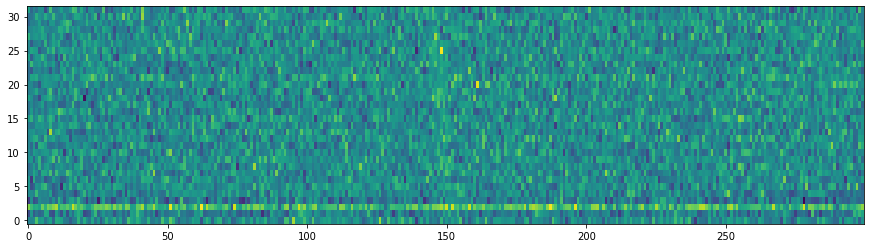

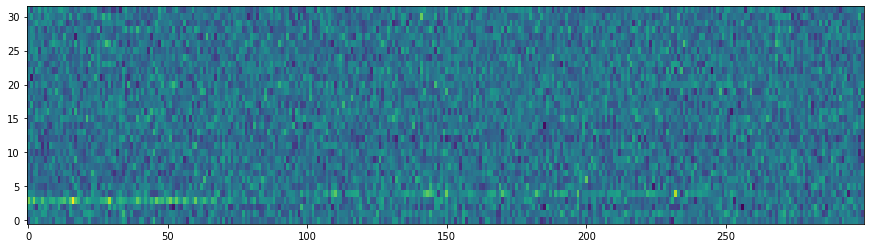

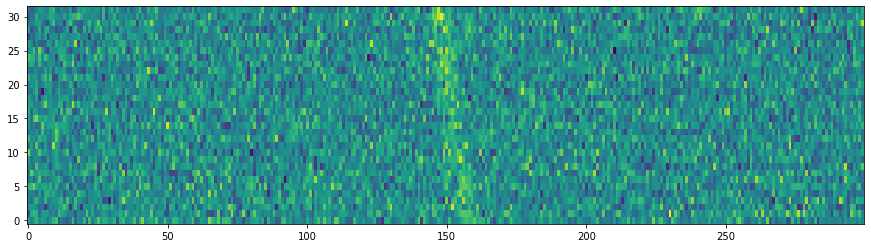

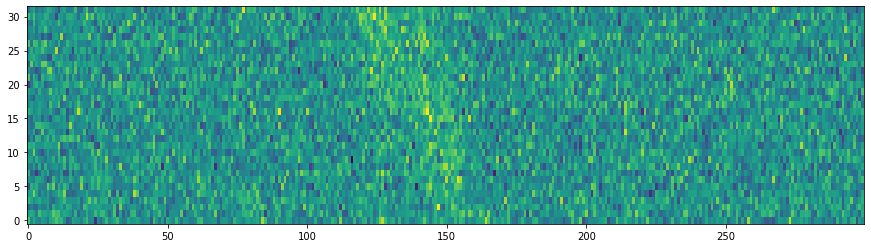

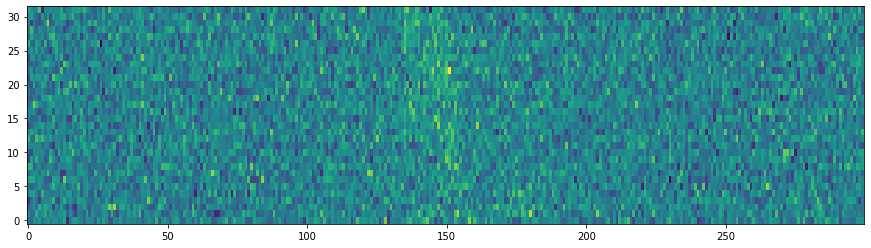

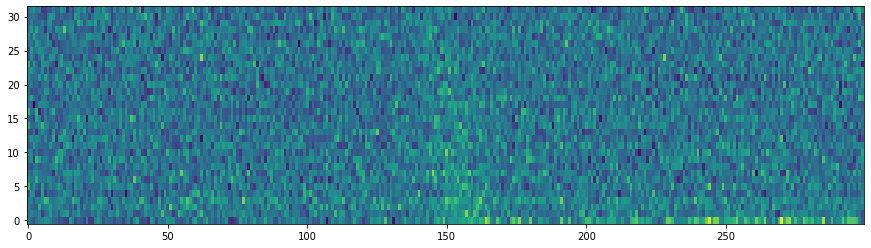

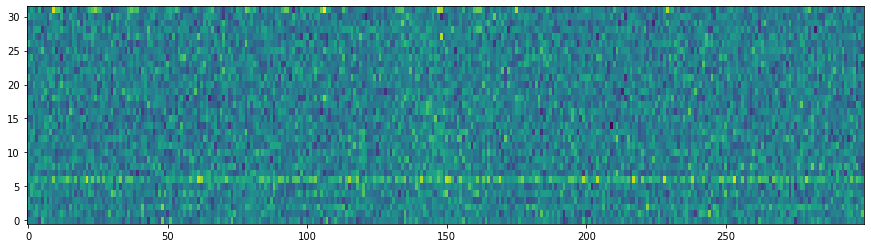

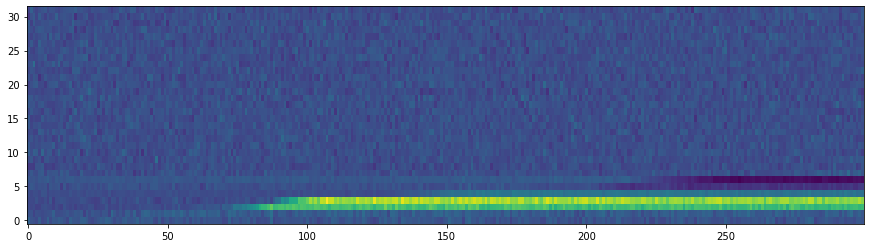

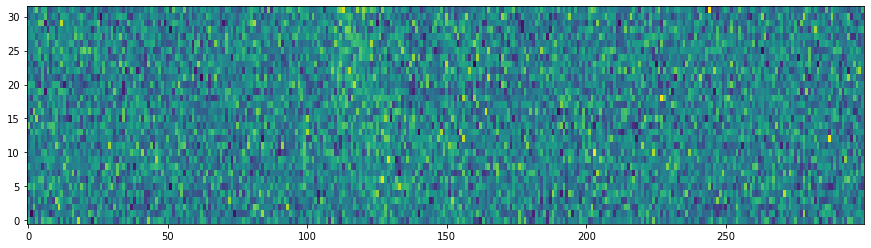

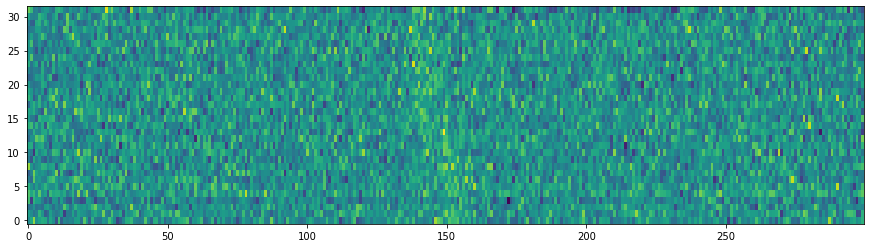

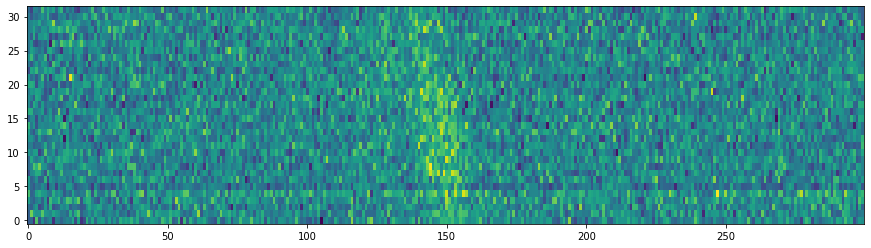

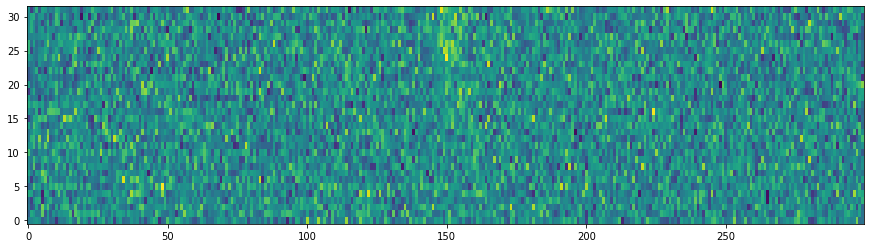

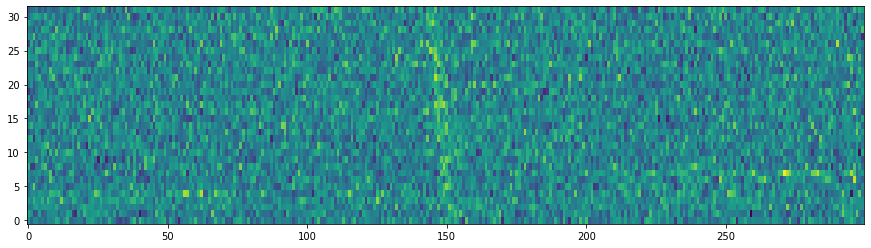

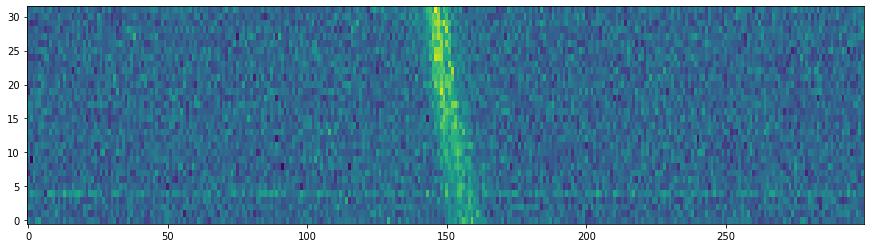

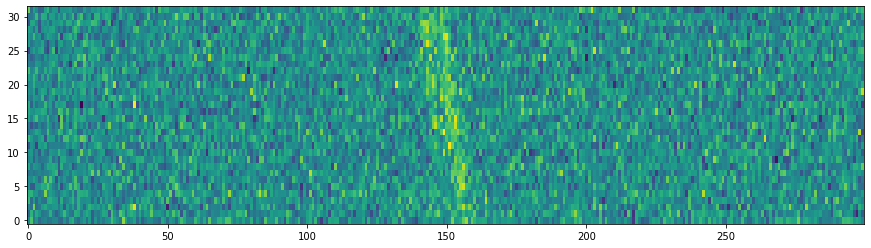

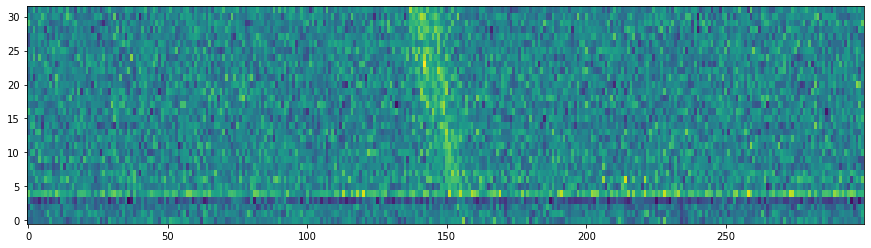

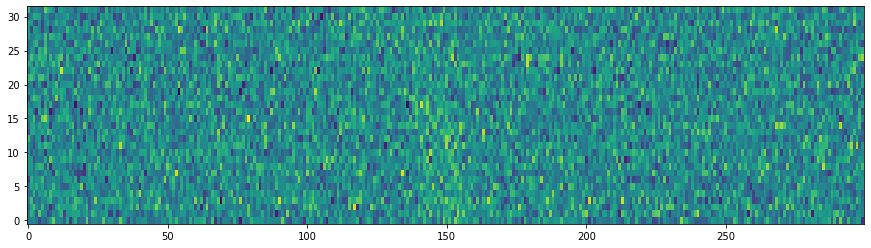

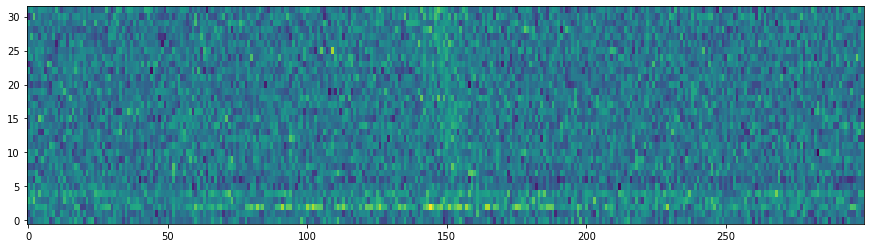

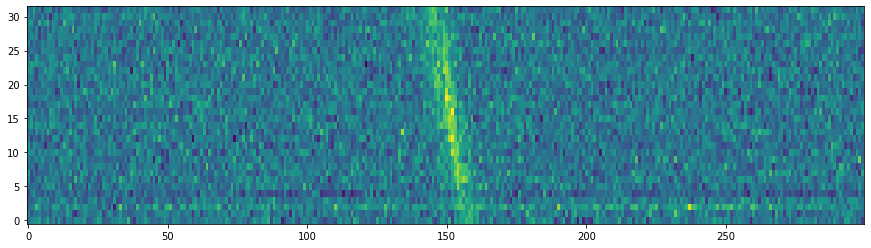

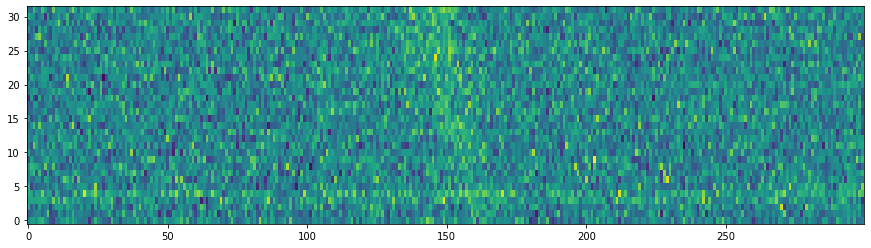

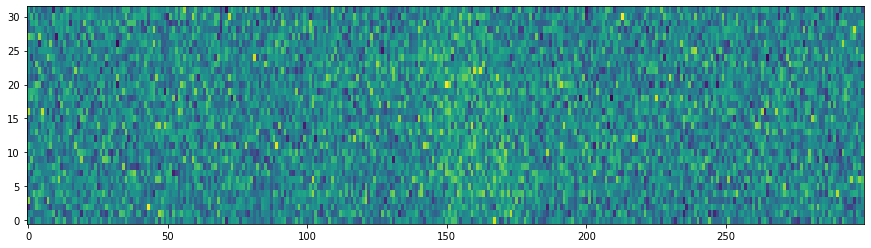

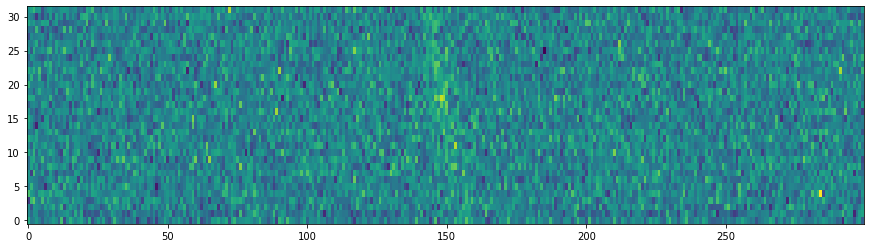

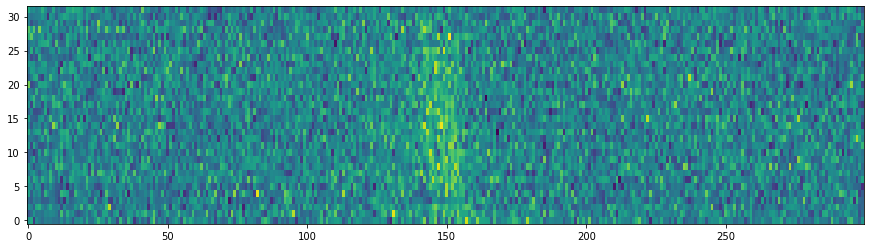

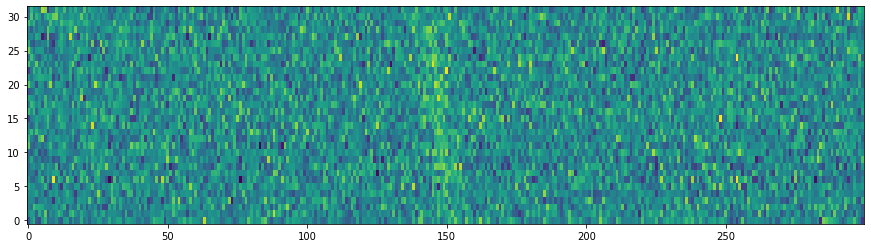

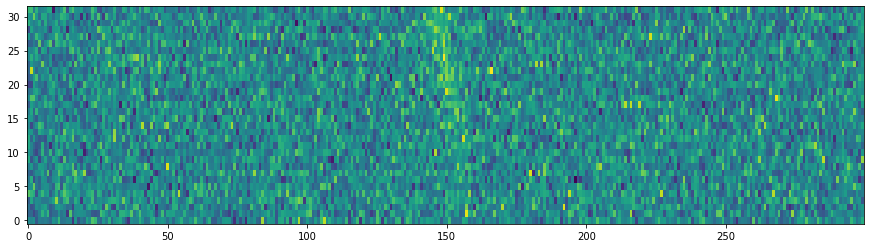

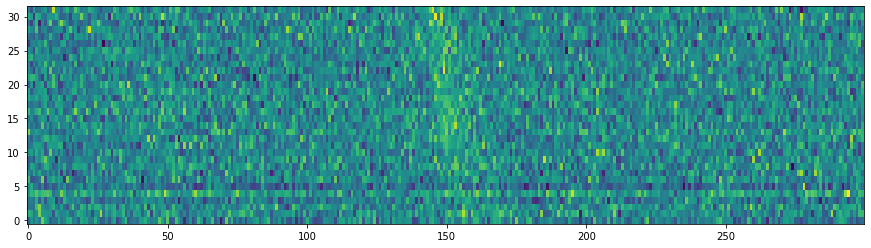

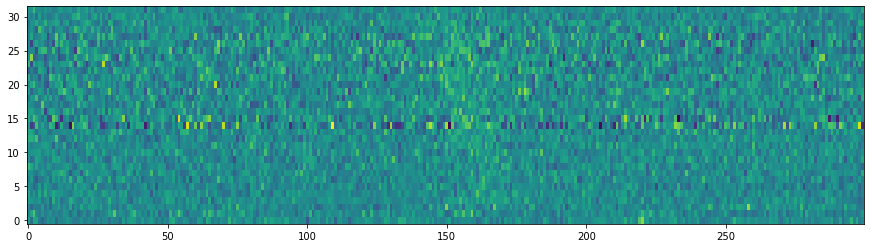

In [2]:
#filename = 'data/oostrum2020/R1_frb121102/R1_B01.rf'
for filename in glob.glob('data/oostrum2020/R1_frb121102/*.rf'):
    #filename = 'data/oostrum2020/R1_frb121102/R1_B01.rf'

    subfall, pkidx = frbrepeaters.loadpsrfits(filename)
    width = 150
    plt.figure(figsize=(15,4))
    plt.imshow(subfall[:, pkidx-width:pkidx+width], origin='lower', interpolation='none', aspect='auto')